# Detect Table

In [1]:
import numpy as np
import skimage.io as io
from skimage.color import rgb2gray
import cv2 as cv

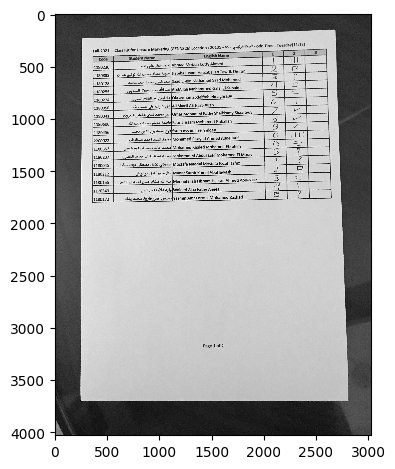

In [2]:
im = io.imread('1.jpg')
if(im.shape[2] == 4):
    im = im[:,:,0:3]

im = rgb2gray(im)

if(im.max() <= 1):
    im = im*255
im = im.astype(np.uint8)
io.imshow(im)

In [3]:
def compute_otsu_criteria(im, th):
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0

    return weight0 * var0 + weight1 * var1

# im = # load your image as a numpy array.
# For testing purposes, one can use for example im = np.random.randint(0,255, size = (50,50))

# testing all thresholds from 0 to the maximum of the image
threshold_range = range(np.max(im)+1)
criterias = [compute_otsu_criteria(im, th) for th in threshold_range]

# best threshold is the one minimizing the Otsu criteria
best_threshold = threshold_range[np.argmin(criterias)]

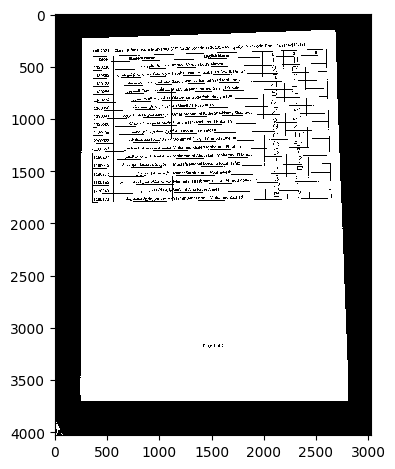

In [4]:
im[im >= best_threshold] = 255
im[im < best_threshold] = 0
io.imshow(im)

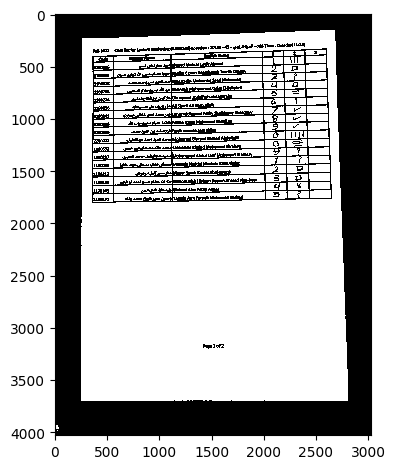

In [5]:
contours, _ = cv.findContours(im.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(im, contours, -1, (0,255,0), 3)
io.imshow(im)